<a href="https://colab.research.google.com/github/ChirudeepG/Assignment2/blob/main/2_Multiclass_Classification_Level_Beginner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 320 kB 5.0 MB/s 
     |████████████████████████████████| 88 kB 9.0 MB/s 
     |████████████████████████████████| 1.7 MB 16.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 56 kB 5.5 MB/s 
     |████████████████████████████████| 2.0 MB 47.2 MB/s 
     |████████████████████████████████| 6.8 MB 53.1 MB/s 
     |████████████████████████████████| 3.3 MB 36.6 MB/s 
     |████████████████████████████████| 1.3 MB 59.9 MB/s 
     |████████████████████████████████| 25.9 MB 85.6 MB/s 
     |████████████████████████████████| 17.0 MB 62 kB/s 
     |████████████████████████████████| 268 kB 73.2 MB/s 
     |████████████████████████████████| 134 kB 73.6 MB/s 
     |████████████████████████████████| 1

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from pycaret.datasets import get_data
import pandas as pd

dataset = pd.read_csv("/content/drive/MyDrive/milknew.csv")

In [ ]:
dataset.shape

(1059, 8)

In [ ]:
data = dataset.sample(frac=0.9, random_state=786)
data_unseen = dataset.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (953, 8)
Unseen Data For Predictions: (106, 8)


In [ ]:
from pycaret.classification import *
exp_mclf101 = setup(data = data, target = 'Grade', session_id=123) 


,Description,Value
0,session_id,123
1,Target,Grade
2,Target Type,Multiclass
3,Label Encoded,"high: 0, low: 1, medium: 2"
4,Original Data,"(953, 8)"
5,Missing Values,False
6,Numeric Features,1
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Grade',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strate...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

In [ ]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9985,1.0000,0.9979,0.9985,0.9985,0.9977,0.9977,0.499
lightgbm,Light Gradient Boosting Machine,0.9970,1.0000,0.9965,0.9972,0.9970,0.9954,0.9955,0.149
gbc,Gradient Boosting Classifier,0.9955,1.0000,0.9944,0.9957,0.9955,0.9931,0.9932,0.277
et,Extra Trees Classifier,0.9955,1.0000,0.9938,0.9956,0.9954,0.9930,0.9932,0.441
dt,Decision Tree Classifier,0.9940,0.9956,0.9932,0.9942,0.9940,0.9908,0.9909,0.013
knn,K Neighbors Classifier,0.9895,0.9988,0.9906,0.9902,0.9895,0.9840,0.9843,0.113
lr,Logistic Regression,0.9354,0.9844,0.9276,0.9412,0.9352,0.9013,0.9041,0.404
lda,Linear Discriminant Analysis,0.9281,0.9731,0.9255,0.9386,0.9283,0.8905,0.8951,0.015
ridge,Ridge Classifier,0.9190,0.0000,0.9021,0.9252,0.9163,0.8753,0.8796,0.011
svm,SVM - Linear Kernel,0.9055,0.0000,0.8788,0.9170,0.8997,0.8533,0.8616,0.059


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


In [ ]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9701,0.9788,0.9736,0.9710,0.9702,0.9543,0.9546
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9851,0.9886,0.9792,0.9857,0.9850,0.9770,0.9773
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:create_model() succesfully completed......................................


In [ ]:
print(dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


In [ ]:
knn = create_model('knn')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9851,0.9996,0.9881,0.9857,0.9851,0.9771,0.9774
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9701,1.0000,0.9762,0.9725,0.9702,0.9543,0.9556
3,0.9701,1.0000,0.9753,0.9724,0.9702,0.9543,0.9556
4,0.9851,1.0000,0.9877,0.9857,0.9851,0.9773,0.9776
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9848,0.9884,0.9792,0.9855,0.9848,0.9767,0.9771


INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')
INFO:logs:create_model() succesfully completed......................................


In [ ]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9254,0.9803,0.9212,0.9353,0.9259,0.8859,0.8898
1,0.9701,1.0000,0.9583,0.9725,0.9698,0.9539,0.9552
2,0.9552,0.9594,0.9375,0.9596,0.9540,0.9303,0.9333
3,0.9403,0.9969,0.9444,0.9522,0.9409,0.9095,0.9144
4,0.9254,0.9754,0.9173,0.9299,0.9254,0.8861,0.8882
5,0.9403,0.9919,0.9369,0.9455,0.9405,0.9092,0.9113
6,0.9552,0.9980,0.9514,0.9562,0.9554,0.9318,0.9321
7,0.9697,0.9824,0.9647,0.9702,0.9697,0.9535,0.9538
8,0.8636,0.9789,0.8569,0.8841,0.8639,0.7932,0.8019


INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 5
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8507,0.9604,0.8450,0.8684,0.8485,0.7672,0.7792
1,0.9403,0.9827,0.9498,0.9448,0.9405,0.9089,0.9111
2,0.9403,0.9824,0.9435,0.9443,0.9403,0.9083,0.9105
3,0.9701,0.9979,0.9753,0.9724,0.9702,0.9543,0.9556
4,0.9552,0.9852,0.9608,0.9559,0.9553,0.9318,0.9321
5,0.9552,0.9948,0.9557,0.9570,0.9552,0.9316,0.9326
6,0.8955,0.9780,0.8926,0.9006,0.8962,0.8396,0.8416
7,0.9697,0.9981,0.9668,0.9703,0.9696,0.9534,0.9538
8,0.9848,0.9881,0.9792,0.9855,0.9848,0.9767,0.9771


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 6
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=14, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
print(tuned_dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=14, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


In [ ]:
import numpy as np
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9701,0.9995,0.9710,0.9715,0.9698,0.9541,0.9551
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9851,1.0000,0.9855,0.9859,0.9851,0.9773,0.9776
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9848,0.9884,0.9792,0.9855,0.9848,0.9767,0.9771


INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 7
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=2, p=2,
                     weights='uniform')
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
tuned_lr = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9254,0.9867,0.9212,0.9353,0.9259,0.8859,0.8898
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9552,0.9581,0.9375,0.9596,0.9540,0.9303,0.9333
3,0.9403,0.9942,0.9444,0.9522,0.9409,0.9095,0.9144
4,0.9254,0.9819,0.9173,0.9299,0.9254,0.8861,0.8882
5,0.9403,0.9965,0.9369,0.9455,0.9405,0.9092,0.9113
6,0.9701,0.9974,0.9710,0.9733,0.9703,0.9546,0.9559
7,0.9697,0.9890,0.9647,0.9702,0.9697,0.9535,0.9538
8,0.8636,0.9748,0.8569,0.8841,0.8639,0.7932,0.8019


INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 8
INFO:logs:LogisticRegression(C=2.833, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


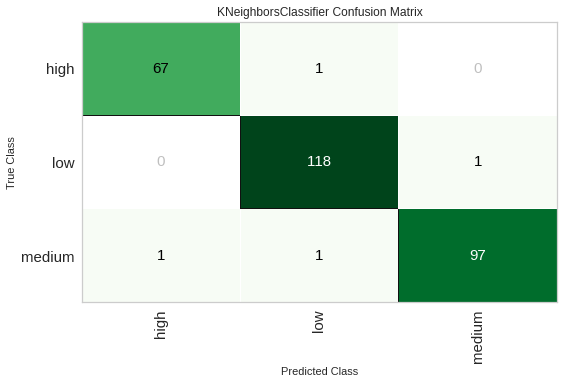

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_knn, plot = 'confusion_matrix')

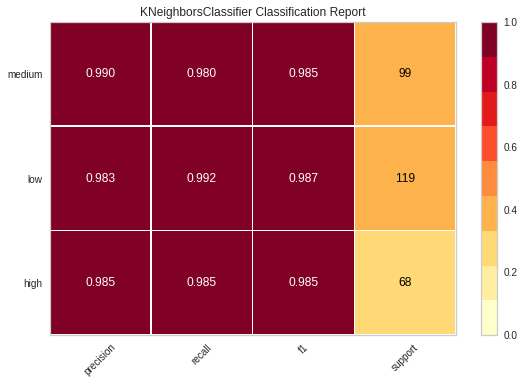

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_knn, plot = 'class_report')

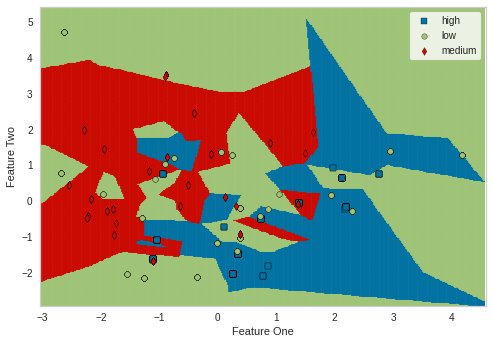

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_knn, plot='boundary')

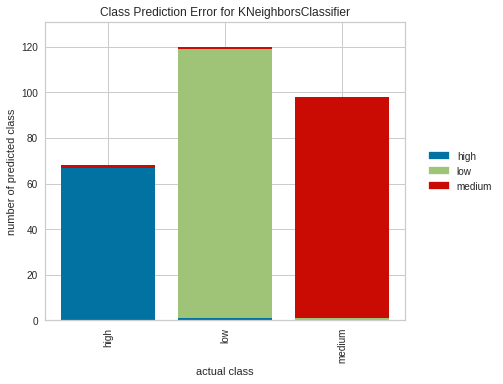

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_knn, plot = 'error')

In [ ]:
evaluate_model(tuned_knn)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=2, p=2,
                     weights='uniform'), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
predict_model(tuned_knn);

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=2, p=2,
                     weights='uniform'), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.986,0.9889,0.9856,0.986,0.986,0.9785,0.9785


In [ ]:
final_knn = finalize_model(tuned_knn)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=2, p=2,
                     weights='uniform'), fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=2, p=2,
                     weights='uniform')
INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=2, p=2,
                     weights='uniform'), fold=None, round=4, cross_validation=True, predict=True, fit_kwargs={}, groups=None, refit=True, verbose=False, system=False, metrics=None, experiment_custom_ta

In [ ]:
print(final_knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=2, p=2,
                     weights='uniform')


In [ ]:
unseen_predictions = predict_model(final_knn, data=data_unseen)
unseen_predictions.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=2, p=2,
                     weights='uniform'), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.0,0.9919,0,0,0,0,0


,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade,Label,Score
0,9.5,34,1,1,0,1,255,low,low,1.0
1,6.6,37,1,1,1,1,255,high,high,1.0
2,3.0,40,1,1,1,1,255,low,low,1.0
3,6.6,38,0,0,0,0,255,medium,medium,1.0
4,9.5,34,1,1,0,1,255,low,low,1.0


In [ ]:
save_model(final_knn,'Final KNN Model 08sep2022')

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=2, p=2,
                     weights='uniform'), model_name=Final KNN Model 08sep2022, prep_pipe_=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Grade',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Grade',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strate...
                 ('fix_perfect', Remove_100(target='Grade')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
          

In [ ]:
saved_final_knn = load_model('Final KNN Model 08sep2022')

INFO:logs:Initializing load_model()
INFO:logs:load_model(model_name=Final KNN Model 08sep2022, platform=None, authentication=None, verbose=True)


Transformation Pipeline and Model Successfully Loaded


In [ ]:
new_prediction = predict_model(saved_final_knn, data=data_unseen)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Grade',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strate...
                ('fix_perfect', Remove_100(target='Grade')),
                ('clean_names', Clean_Colum_Names()),
                ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                ('

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.0,0.9919,0,0,0,0,0


In [ ]:
new_prediction = predict_model(saved_final_knn, data=data_unseen)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Grade',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strate...
                ('fix_perfect', Remove_100(target='Grade')),
                ('clean_names', Clean_Colum_Names()),
                ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                ('

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.0,0.9919,0,0,0,0,0


In [ ]:
new_prediction.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade,Label,Score
0,9.5,34,1,1,0,1,255,low,low,1.0
1,6.6,37,1,1,1,1,255,high,high,1.0
2,3.0,40,1,1,1,1,255,low,low,1.0
3,6.6,38,0,0,0,0,255,medium,medium,1.0
4,9.5,34,1,1,0,1,255,low,low,1.0
